## PCA challenge ;)

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset preparation

Loading and analyzing the dataset.


In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Giffy/AI_Intro-to-Machine-Learning/master/Session-5/Datasets/dataset.csv.zip',index_col=0, header=None).T
dataset = dataset.rename(columns={np.nan: 'id'})
dataset = dataset.set_index('id')
dataset

,Feature00001,Feature00002,Feature00003,Feature00004,Feature00005,Feature00006,Feature00007,Feature00008,Feature00009,Feature00010,Feature00011,Feature00012,Feature00013,Feature00014,Feature00015,Feature00016,Feature00017,Feature00018,Feature00019,Feature00020,Feature00021,Feature00022,Feature00023,Feature00024,Feature00025,Feature00026,Feature00027,Feature00028,Feature00029,Feature00030,Feature00031,Feature00032,Feature00033,Feature00034,Feature00035,Feature00036,Feature00037,Feature00038,Feature00039,Feature00040,...,Feature24651,Feature24652,Feature24653,Feature24654,Feature24655,Feature24656,Feature24657,Feature24658,Feature24659,Feature24660,Feature24661,Feature24662,Feature24663,Feature24664,Feature24665,Feature24666,Feature24667,Feature24668,Feature24669,Feature24670,Feature24671,Feature24672,Feature24673,Feature24674,Feature24675,Feature24676,Feature24677,Feature24678,Feature24679,Feature24680,Feature24681,Feature24682,Feature24683,Feature24684,Feature24685,Feature24686,Feature24687,Feature24688,Feature24689,Feature24690
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Observation1,2,4,0,0,19,7,0,4,7,86,22,276,298,30,0,89,0,26,30,227,185,93,0,915,738,0,1,803,0,3398,38,351,15,303,41,228,70,39,85,146,...,0,0,0,28,14,0,0,0,0,0,1,14,0,0,68,0,0,1,0,0,20,0,181,0,9,0,2,483,5,0,0,0,0,0,0,0,4,134,0,0
Observation2,4,1,1,0,10,5,0,1,5,53,21,224,282,34,0,53,0,25,22,212,158,81,0,683,575,0,2,617,0,2740,30,352,18,279,36,234,52,40,68,130,...,0,0,0,29,11,0,0,0,0,0,1,8,0,0,49,0,0,0,0,0,9,0,157,3,12,0,2,336,1,0,0,0,0,0,0,0,4,118,0,0
Observation3,18,3,4,0,19,1,2,12,2,86,58,209,327,57,0,66,0,60,26,229,265,53,0,1140,480,0,4,283,0,2078,31,373,142,185,71,334,45,69,151,169,...,1,0,1,40,8,0,0,0,0,0,5,11,0,0,81,0,0,0,0,0,25,0,336,1,9,0,0,296,5,0,0,4,0,0,0,0,3,98,0,0
Observation4,24,1,2,0,13,0,1,18,1,78,49,280,297,63,0,52,0,88,28,258,354,75,0,1210,490,0,6,344,0,1776,34,291,133,219,81,312,62,44,176,191,...,1,0,0,24,8,0,0,0,0,0,5,9,0,0,75,0,0,0,0,0,41,0,374,0,20,0,0,289,6,0,0,2,0,0,0,0,1,80,0,0
Observation5,7,5,0,0,50,31,0,21,30,257,85,903,1228,129,0,191,0,88,132,748,524,346,1,3030,2398,0,9,3170,0,13572,139,1070,55,1073,150,677,236,125,305,330,...,0,0,0,55,34,0,0,0,0,0,10,46,0,0,249,0,0,1,0,0,93,0,527,4,18,0,15,1614,6,0,0,2,0,0,0,2,11,372,0,0
Observation6,4,4,5,0,57,26,0,19,32,254,89,978,1258,105,0,240,0,33,96,716,577,351,0,3192,2334,0,3,3118,0,13588,146,1228,50,1083,116,723,206,138,233,322,...,0,0,1,66,37,0,0,0,0,0,12,53,0,0,201,0,0,0,0,0,57,0,513,6,17,0,11,1726,6,0,0,3,0,0,0,0,20,461,0,0
Observation7,93,9,2,0,45,12,0,127,75,434,262,1061,1853,274,0,265,0,260,143,1201,1007,259,1,5614,2398,1,15,2368,1,11954,196,1856,629,1018,441,1478,320,204,701,665,...,6,0,2,81,27,1,0,0,0,0,33,54,0,0,342,0,0,1,0,0,177,0,1232,4,51,0,3,1864,17,0,0,6,0,0,0,3,20,417,0,0
Observation8,77,4,6,0,58,9,0,98,42,454,247,1056,1928,226,0,194,0,214,149,1136,918,303,0,5271,2552,0,7,2578,0,13926,188,1528,776,1027,311,1145,338,196,710,463,...,1,0,3,79,45,0,0,0,0,0,27,80,0,0,339,0,0,1,0,0,121,0,1152,5,38,0,6,1971,36,0,0,7,0,0,0,1,15,525,0,0


In [0]:
#let's check the type of the column
dataset.dtypes

0
Feature00001    object
Feature00002    object
Feature00003    object
Feature00004    object
Feature00005    object
                 ...  
Feature24686    object
Feature24687    object
Feature24688    object
Feature24689    object
Feature24690    object
Length: 24690, dtype: object

In [0]:
#convert the type of the column to float
dataset=dataset.astype(pd.np.float64)

In [0]:
# are there any na?
dataset[dataset.isnull().any(axis=1)] 

,Feature00001,Feature00002,Feature00003,Feature00004,Feature00005,Feature00006,Feature00007,Feature00008,Feature00009,Feature00010,Feature00011,Feature00012,Feature00013,Feature00014,Feature00015,Feature00016,Feature00017,Feature00018,Feature00019,Feature00020,Feature00021,Feature00022,Feature00023,Feature00024,Feature00025,Feature00026,Feature00027,Feature00028,Feature00029,Feature00030,Feature00031,Feature00032,Feature00033,Feature00034,Feature00035,Feature00036,Feature00037,Feature00038,Feature00039,Feature00040,...,Feature24651,Feature24652,Feature24653,Feature24654,Feature24655,Feature24656,Feature24657,Feature24658,Feature24659,Feature24660,Feature24661,Feature24662,Feature24663,Feature24664,Feature24665,Feature24666,Feature24667,Feature24668,Feature24669,Feature24670,Feature24671,Feature24672,Feature24673,Feature24674,Feature24675,Feature24676,Feature24677,Feature24678,Feature24679,Feature24680,Feature24681,Feature24682,Feature24683,Feature24684,Feature24685,Feature24686,Feature24687,Feature24688,Feature24689,Feature24690
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


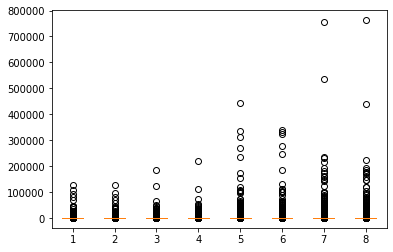

In [0]:
# distribution of each observation
fig, ax = plt.subplots()
ax.boxplot(dataset)

plt.show()

In [0]:
# the 8 observations seems to have a very different distributions and range of values
np.mean(dataset,axis=1), np.std(dataset,axis=1)

(id
 Observation1    213.967396
 Observation2    184.775213
 Observation3    198.372094
 Observation4    207.524585
 Observation5    717.108546
 Observation6    706.749534
 Observation7    957.840826
 Observation8    953.308100
 dtype: float64, id
 Observation1    1699.397333
 Observation2    1548.759100
 Observation3    1765.139860
 Observation4    1916.277118
 Observation5    5645.526627
 Observation6    5385.743404
 Observation7    7727.236193
 Observation8    7381.698757
 dtype: float64)

# Principal Component Analysis

In [0]:
#let's check different type of scaling
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(dataset) 
round(np.mean(x_std),1),np.std(x_std)

(-0.0, 0.8687220541061457)

In [0]:
from sklearn.preprocessing import MinMaxScaler
x_std1 = MinMaxScaler().fit_transform(dataset)
round(np.mean(x_std1),1),np.std(x_std1)

(0.3, 0.3738415362124295)

In [0]:
from sklearn.preprocessing import RobustScaler
x_std2 = RobustScaler().fit_transform(dataset)
round(np.mean(x_std2),1),np.std(x_std2)

(0.2, 0.8583977116485212)



---


 *For each scaler, let's see how they perform in terms of variance explained with the PCA decomposition and considering intially 5 components*

---



In [0]:
from sklearn.decomposition import PCA
pca_dataset = PCA(n_components=5)
principalComponents = pca_dataset.fit_transform(x_std)
pc_explained = pca_dataset.explained_variance_ratio_.tolist()
print('Explained cumulative variance  per principal component with normal StandardScaler: {}'.format(np.cumsum(pc_explained)))

Explained cumulative variance  per principal component with normal StandardScaler: [0.73135743 0.86910306 0.92423819 0.95971649 0.97527011]


In [0]:
from sklearn.decomposition import PCA
pca_dataset = PCA(n_components=5)
principalComponents = pca_dataset.fit_transform(x_std1)
pc_explained1 = pca_dataset.explained_variance_ratio_.tolist()
print('Explained cumulative variance  per principal component with normal MinMaxScaler: {}'.format(np.cumsum(pc_explained1)))

Explained cumulative variance  per principal component with normal MinMaxScaler: [0.75043314 0.87944226 0.92723008 0.96043938 0.97557306]


In [0]:
from sklearn.decomposition import PCA
pca_dataset = PCA(n_components=5)
principalComponents = pca_dataset.fit_transform(x_std2)
pc_explained2 = pca_dataset.explained_variance_ratio_.tolist()
print('Explained cumulative variance per principal component with normal RobustScaler: {}'.format(np.cumsum(pc_explained2)))

Explained cumulative variance per principal component with normal RobustScaler: [0.59456845 0.76114215 0.8919541  0.94988387 0.97013285]




---

 Among the three ways to scale the data, the RobustScaler is the worst while the MinMaxScaler seems to perform better. I will keep this last one in the following 


---




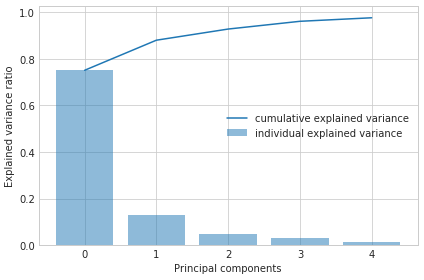

In [0]:
with plt.style.context('seaborn-whitegrid'):
  plt.figure(figsize=(6, 4))

  plt.bar(range(len(pc_explained1)), pc_explained1, alpha=0.5, align='center',
          label='individual explained variance')
  plt.plot(range(len(pc_explained1)), np.cumsum(pc_explained1),
            label='cumulative explained variance')

  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principal components')
  plt.legend(loc='best')
  plt.tight_layout()



---


To answer to **question 4-5-6**: it depends on the scope of the problem and the dimension of dataset. By looking at the cumulative variance explained, we can choose how many components to take into account.

In this example, to explain the 95% of the variance we should take at least 4 components. Plot the 4 $PC_{i}$  will not be possible, so we loose the graphical visualization. Moreover between the 3rd and 4rd $PC_{i}$ there is not a huge gap.

**Question 7-8** To explain the 85% we need to take into account the first 2 $PC_{i}$


---




In [0]:
#just 2 component for the 85% of variance explained
pca = PCA(n_components=2).fit(x_std1)
x_pca = pca.transform(x_std1)
x_pca.shape

df_pca = pd.DataFrame(data = x_pca
             , columns = ['principal component 1', 'principal component 2'])
df_pca

,principal component 1,principal component 2
0,-41.303047,1.201571
1,-45.207057,-0.365676
2,-42.628554,-10.702607
3,-41.435495,-11.426462
4,23.943819,26.368172
5,24.121369,32.209353
6,63.066893,-24.450756
7,59.442072,-12.833596


<Figure size 432x288 with 0 Axes>

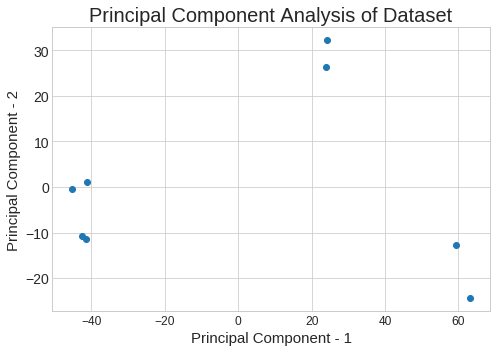

In [0]:
#plot 2 d 
with plt.style.context('seaborn-whitegrid'):
  plt.figure()
  plt.figure(figsize=(7,5))
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=14)
  plt.xlabel('Principal Component - 1',fontsize=15)
  plt.ylabel('Principal Component - 2',fontsize=15)
  plt.title("Principal Component Analysis of Dataset",fontsize=20)
  
  plt.scatter(df_pca.loc[:, 'principal component 1'],
              df_pca.loc[:, 'principal component 2'])
  plt.tight_layout()
  plt.show()